In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error


from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

### Import file to pandas

In [2]:
data = pd.read_csv("billionare.csv")

In [3]:
data

,position,wealth,industry,full_name,age,country_of_residence,city_of_residence,source,citizenship,gender,...,gdp_country,g_tertiary_ed_enroll,g_primary_ed_enroll,life_expectancy,tax_revenue,tax_rate,country_pop,country_lat,country_long,continent
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,France,M,...,2715518274227,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,Europe
1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,2540,1000,Healthcare,Yu Rong,51,China,Shanghai,Health clinics,China,M,...,19910000000000,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,Asia
2587,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80,United States,Pottsville,Beer,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
2588,2540,1000,Manufacturing,Zhang Gongyun,60,China,Gaomi,Tyre manufacturing machinery,China,M,...,19910000000000,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,Asia
2589,2540,1000,Real Estate,Zhang Guiping & family,71,China,Nanjing,Real estate,China,M,...,19910000000000,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,Asia


### 1. Get Data Information 

### 1.1 Type

In [4]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591 entries, 0 to 2590
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   position              2591 non-null   int64  
 1   wealth                2591 non-null   int64  
 2   industry              2591 non-null   object 
 3   full_name             2591 non-null   object 
 4   age                   2591 non-null   int64  
 5   country_of_residence  2591 non-null   object 
 6   city_of_residence     2591 non-null   object 
 7   source                2591 non-null   object 
 8   citizenship           2591 non-null   object 
 9   gender                2591 non-null   object 
 10  birth_date            2591 non-null   object 
 11  last_name             2591 non-null   object 
 12  first_name            2591 non-null   object 
 13  residence_state       2591 non-null   object 
 14  residence_region      2591 non-null   object 
 15  birth_year           

In [5]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591 entries, 0 to 2590
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   position              2591 non-null   int64  
 1   wealth                2591 non-null   int64  
 2   industry              2591 non-null   object 
 3   full_name             2591 non-null   object 
 4   age                   2591 non-null   int64  
 5   country_of_residence  2591 non-null   object 
 6   city_of_residence     2591 non-null   object 
 7   source                2591 non-null   object 
 8   citizenship           2591 non-null   object 
 9   gender                2591 non-null   object 
 10  birth_date            2591 non-null   object 
 11  last_name             2591 non-null   object 
 12  first_name            2591 non-null   object 
 13  residence_state       2591 non-null   object 
 14  residence_region      2591 non-null   object 
 15  birth_year           

In [6]:
data = data [["position","wealth","industry","age","country_of_residence","citizenship","gender",
           "cpi_country","gdp_country","life_expectancy","tax_revenue","tax_rate",
           "country_pop","continent"]]

data

,position,wealth,industry,age,country_of_residence,citizenship,gender,cpi_country,gdp_country,life_expectancy,tax_revenue,tax_rate,country_pop,continent
0,1,211000,Fashion & Retail,74,France,France,M,110.05,2715518274227,82.5,24.2,60.7,67059887,Europe
1,2,180000,Automotive,51,United States,United States,M,117.24,21427700000000,78.5,9.6,36.6,328239523,North America
2,3,114000,Technology,59,United States,United States,M,117.24,21427700000000,78.5,9.6,36.6,328239523,North America
3,4,107000,Technology,78,United States,United States,M,117.24,21427700000000,78.5,9.6,36.6,328239523,North America
4,5,106000,Finance & Investments,92,United States,United States,M,117.24,21427700000000,78.5,9.6,36.6,328239523,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,2540,1000,Healthcare,51,China,China,M,125.08,19910000000000,77.0,9.4,59.2,1397715000,Asia
2587,2540,1000,Food & Beverage,80,United States,United States,M,117.24,21427700000000,78.5,9.6,36.6,328239523,North America
2588,2540,1000,Manufacturing,60,China,China,M,125.08,19910000000000,77.0,9.4,59.2,1397715000,Asia
2589,2540,1000,Real Estate,71,China,China,M,125.08,19910000000000,77.0,9.4,59.2,1397715000,Asia


### 1.2 Statistic

In [7]:
data.describe()

,position,wealth,age,gdp_country,life_expectancy,tax_revenue,tax_rate,country_pop
count,2591.000000,2591.000000,2591.000000,2.591000e+03,2591.000000,2591.000000,2591.000000,2.591000e+03
mean,1282.913547,4666.190660,65.252798,1.102966e+13,78.409101,12.422926,44.548012,4.837733e+08
std,740.191092,9917.104258,13.055442,9.641891e+12,3.910509,5.275224,12.212804,5.497567e+08
min,1.000000,1000.000000,18.000000,1.044779e+09,54.300000,0.000000,0.000000,3.112200e+04
25%,636.000000,1500.000000,56.000000,1.394116e+12,77.000000,9.500000,36.600000,6.029740e+07
50%,1272.000000,2400.000000,65.000000,5.081770e+12,78.500000,9.600000,46.100000,3.282395e+08
75%,1905.000000,4300.000000,75.000000,2.142770e+13,81.300000,12.800000,59.200000,1.366418e+09
max,2540.000000,211000.000000,101.000000,2.142770e+13,85.940000,37.200000,106.300000,1.397715e+09


## 2.Handling Missing Value


In [8]:
data.isna().sum()

position                0
wealth                  0
industry                0
age                     0
country_of_residence    0
citizenship             0
gender                  0
cpi_country             0
gdp_country             0
life_expectancy         0
tax_revenue             0
tax_rate                0
country_pop             0
continent               0
dtype: int64

### Handling Inconsitance Data

In [9]:
categorical = data.select_dtypes(include="object").columns

categorical

Index(['industry', 'country_of_residence', 'citizenship', 'gender',
       'cpi_country', 'continent'],
      dtype='object')

In [10]:
for i in categorical:
    print (i)
    print (data[i].unique())
    print ()
    

industry
['Fashion & Retail' 'Automotive' 'Technology' 'Finance & Investments'
 'Media & Entertainment' 'Telecom' 'Diversified' 'Food & Beverage'
 'Logistics' 'Gambling & Casinos' 'Manufacturing' 'Real Estate'
 'Metals & Mining' 'Energy' 'Healthcare' 'Service'
 'Construction & Engineering' 'Sports']

country_of_residence
['France' 'United States' 'Mexico' 'India' 'Spain' 'China' 'Canada'
 'Germany' 'Switzerland' 'Belgium' 'Hong Kong' 'Austria' 'Japan'
 'United Kingdom' 'Australia' 'Indonesia' 'United Arab Emirates' 'Russia'
 'Chile' 'Monaco' 'Czech Republic' 'Sweden' 'Thailand' 'Uzbekistan'
 'Singapore' 'Nigeria' 'Israel' 'Italy' 'South Africa' 'Brazil' 'Malaysia'
 'South Korea' 'New Zealand' 'Philippines' 'Taiwan' 'Norway' 'Egypt'
 'Denmark' 'Eswatini (Swaziland)' 'Colombia' 'Netherlands' 'Poland'
 'Bahamas' 'Ukraine' 'Cayman Islands' 'Greece' 'Turkey' 'Argentina'
 'Georgia' 'Portugal' 'Kazakhstan' 'Algeria' 'Vietnam' 'Latvia' 'Finland'
 'Bermuda' 'Luxembourg' 'British Virgin Islands'

In [11]:
data = data[data["cpi_country"] != "No CPI info"]
data

,position,wealth,industry,age,country_of_residence,citizenship,gender,cpi_country,gdp_country,life_expectancy,tax_revenue,tax_rate,country_pop,continent
0,1,211000,Fashion & Retail,74,France,France,M,110.05,2715518274227,82.5,24.2,60.7,67059887,Europe
1,2,180000,Automotive,51,United States,United States,M,117.24,21427700000000,78.5,9.6,36.6,328239523,North America
2,3,114000,Technology,59,United States,United States,M,117.24,21427700000000,78.5,9.6,36.6,328239523,North America
3,4,107000,Technology,78,United States,United States,M,117.24,21427700000000,78.5,9.6,36.6,328239523,North America
4,5,106000,Finance & Investments,92,United States,United States,M,117.24,21427700000000,78.5,9.6,36.6,328239523,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,2540,1000,Healthcare,51,China,China,M,125.08,19910000000000,77.0,9.4,59.2,1397715000,Asia
2587,2540,1000,Food & Beverage,80,United States,United States,M,117.24,21427700000000,78.5,9.6,36.6,328239523,North America
2588,2540,1000,Manufacturing,60,China,China,M,125.08,19910000000000,77.0,9.4,59.2,1397715000,Asia
2589,2540,1000,Real Estate,71,China,China,M,125.08,19910000000000,77.0,9.4,59.2,1397715000,Asia


In [12]:
data ["cpi_country"]= data["cpi_country"].astype(float)  #kalau semua angka

C:\Users\pipit\AppData\Local\Temp\ipykernel_1796\2042157813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data ["cpi_country"]= data["cpi_country"].astype(float)  #kalau semua angka


### Encoding

for row,column in data.itterows():
    if column ["source"] in ["Tesla", "SpaceX", "Microsoft"]:
        data.at[row,"source_group"] = "it"
    elif column []

In [13]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 2446 entries, 0 to 2590
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   position              2446 non-null   int64  
 1   wealth                2446 non-null   int64  
 2   industry              2446 non-null   object 
 3   age                   2446 non-null   int64  
 4   country_of_residence  2446 non-null   object 
 5   citizenship           2446 non-null   object 
 6   gender                2446 non-null   object 
 7   cpi_country           2446 non-null   float64
 8   gdp_country           2446 non-null   int64  
 9   life_expectancy       2446 non-null   float64
 10  tax_revenue           2446 non-null   float64
 11  tax_rate              2446 non-null   float64
 12  country_pop           2446 non-null   int64  
 13  continent             2446 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 286.6+ KB


In [14]:
numerical_data = data [["position","wealth","age","life_expectancy","tax_revenue","tax_rate","country_pop",
                       "cpi_country","gdp_country"]]
numerical_data 

,position,wealth,age,life_expectancy,tax_revenue,tax_rate,country_pop,cpi_country,gdp_country
0,1,211000,74,82.5,24.2,60.7,67059887,110.05,2715518274227
1,2,180000,51,78.5,9.6,36.6,328239523,117.24,21427700000000
2,3,114000,59,78.5,9.6,36.6,328239523,117.24,21427700000000
3,4,107000,78,78.5,9.6,36.6,328239523,117.24,21427700000000
4,5,106000,92,78.5,9.6,36.6,328239523,117.24,21427700000000
...,...,...,...,...,...,...,...,...,...
2586,2540,1000,51,77.0,9.4,59.2,1397715000,125.08,19910000000000
2587,2540,1000,80,78.5,9.6,36.6,328239523,117.24,21427700000000
2588,2540,1000,60,77.0,9.4,59.2,1397715000,125.08,19910000000000
2589,2540,1000,71,77.0,9.4,59.2,1397715000,125.08,19910000000000


### Nominal Data

In [15]:
nominal_data = data [['industry', 'gender', 'citizenship','country_of_residence', 'continent']]
nominal_data

,industry,gender,citizenship,country_of_residence,continent
0,Fashion & Retail,M,France,France,Europe
1,Automotive,M,United States,United States,North America
2,Technology,M,United States,United States,North America
3,Technology,M,United States,United States,North America
4,Finance & Investments,M,United States,United States,North America
...,...,...,...,...,...
2586,Healthcare,M,China,China,Asia
2587,Food & Beverage,M,United States,United States,North America
2588,Manufacturing,M,China,China,Asia
2589,Real Estate,M,China,China,Asia


### 4.1. Convert categorical variable (Nominal Data) into dummy/indicator variables

In [16]:
nominal_data = pd.get_dummies(nominal_data,dtype="int")
nominal_data

,industry_Automotive,industry_Construction & Engineering,industry_Diversified,industry_Energy,industry_Fashion & Retail,industry_Finance & Investments,industry_Food & Beverage,industry_Gambling & Casinos,industry_Healthcare,industry_Logistics,...,country_of_residence_United Kingdom,country_of_residence_United States,country_of_residence_Uruguay,country_of_residence_Vietnam,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2587,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Join by Index

In [17]:
final_data = pd.merge(numerical_data,nominal_data, left_index = True, right_index = True)
final_data

,position,wealth,age,life_expectancy,tax_revenue,tax_rate,country_pop,cpi_country,gdp_country,industry_Automotive,...,country_of_residence_United Kingdom,country_of_residence_United States,country_of_residence_Uruguay,country_of_residence_Vietnam,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,1,211000,74,82.5,24.2,60.7,67059887,110.05,2715518274227,0,...,0,0,0,0,0,0,1,0,0,0
1,2,180000,51,78.5,9.6,36.6,328239523,117.24,21427700000000,1,...,0,1,0,0,0,0,0,1,0,0
2,3,114000,59,78.5,9.6,36.6,328239523,117.24,21427700000000,0,...,0,1,0,0,0,0,0,1,0,0
3,4,107000,78,78.5,9.6,36.6,328239523,117.24,21427700000000,0,...,0,1,0,0,0,0,0,1,0,0
4,5,106000,92,78.5,9.6,36.6,328239523,117.24,21427700000000,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,2540,1000,51,77.0,9.4,59.2,1397715000,125.08,19910000000000,0,...,0,0,0,0,0,1,0,0,0,0
2587,2540,1000,80,78.5,9.6,36.6,328239523,117.24,21427700000000,0,...,0,1,0,0,0,0,0,1,0,0
2588,2540,1000,60,77.0,9.4,59.2,1397715000,125.08,19910000000000,0,...,0,0,0,0,0,1,0,0,0,0
2589,2540,1000,71,77.0,9.4,59.2,1397715000,125.08,19910000000000,0,...,0,0,0,0,0,1,0,0,0,0


## Handling Outlier 

array([[<Axes: title={'center': 'position'}>,
        <Axes: title={'center': 'wealth'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'cpi_country'}>,
        <Axes: title={'center': 'gdp_country'}>,
        <Axes: title={'center': 'life_expectancy'}>],
       [<Axes: title={'center': 'tax_revenue'}>,
        <Axes: title={'center': 'tax_rate'}>,
        <Axes: title={'center': 'country_pop'}>]], dtype=object)

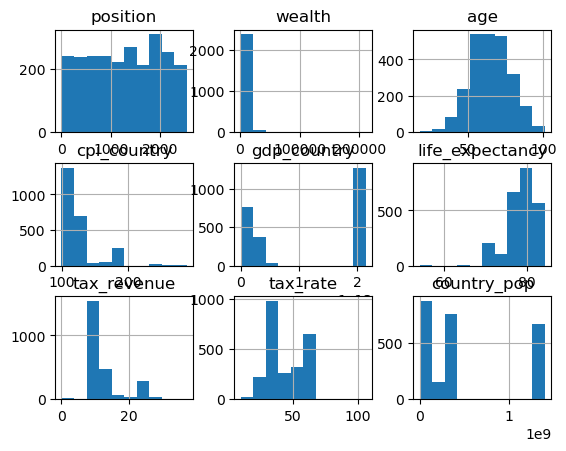

In [18]:
data.hist()

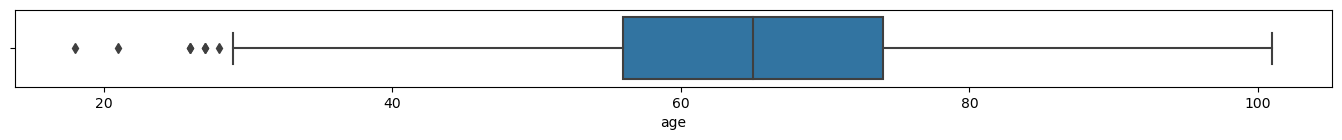

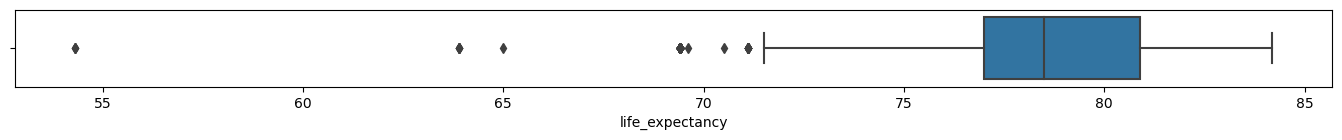

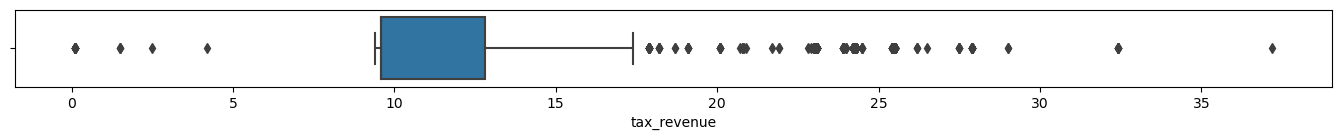

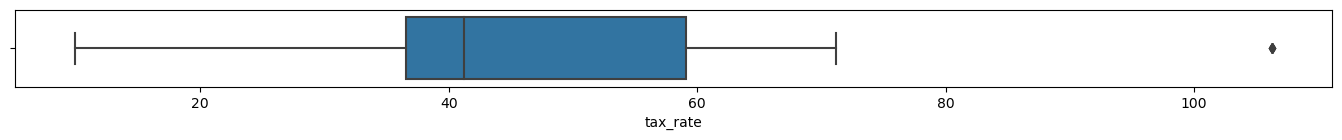

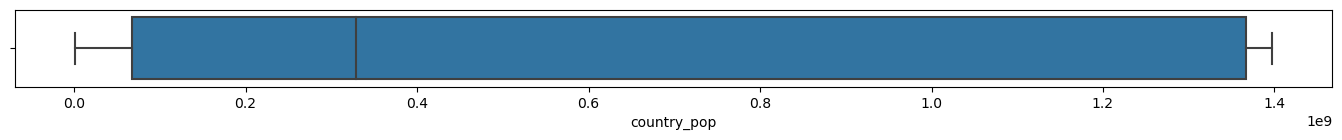

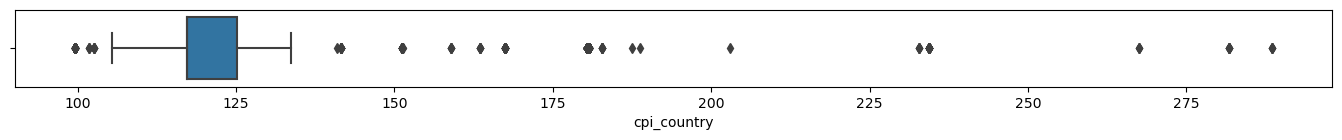

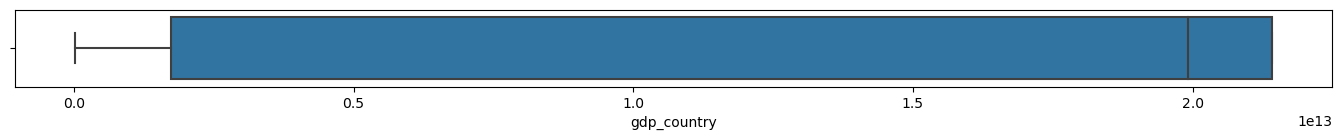

In [19]:
for i in final_data [["age","life_expectancy","tax_revenue","tax_rate","country_pop","cpi_country","gdp_country"]]:
    plt.figure(figsize=(17,1))
    sns.boxplot(data= final_data [["age","life_expectancy","tax_revenue","tax_rate","country_pop","cpi_country","gdp_country"]], x=i)

In [20]:
def handle_outlier (column, data, method):

    for i in column:
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr = q3-q1
        upper_bound = q3 + (1.5*iqr)
        lower_bound = q1 - (1.5*iqr)
        outlier = data [(data[i] < lower_bound) | (data[i]>upper_bound)] 
        print("jumlah outlier column",i,":",len(outlier),"dengan persentasi:", len(outlier)/len(data[i]))
        if method == "remove" :
            data = data[(data[i]>=lower_bound) & (data[i]<=upper_bound)]
        elif method =="trim":
            data[i] = data[i].clip(lower =lower_bound, upper = upper_bound)
    return(data)


final_data = handle_outlier (["age","life_expectancy","tax_revenue","tax_rate","country_pop","cpi_country","gdp_country"], final_data, "trim")

jumlah outlier column age : 7 dengan persentasi: 0.0028618152085036794
jumlah outlier column life_expectancy : 182 dengan persentasi: 0.07440719542109567
jumlah outlier column tax_revenue : 409 dengan persentasi: 0.16721177432542927
jumlah outlier column tax_rate : 4 dengan persentasi: 0.001635322976287817
jumlah outlier column country_pop : 0 dengan persentasi: 0.0
jumlah outlier column cpi_country : 468 dengan persentasi: 0.19133278822567457
jumlah outlier column gdp_country : 0 dengan persentasi: 0.0


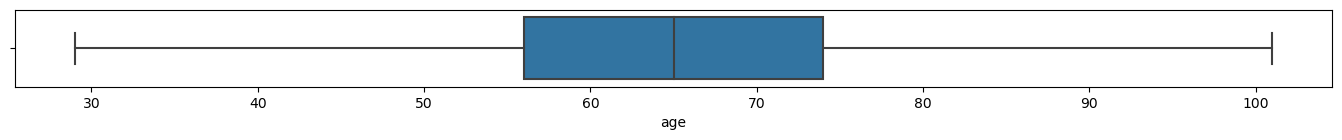

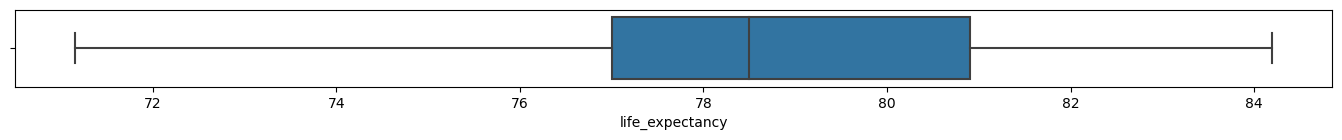

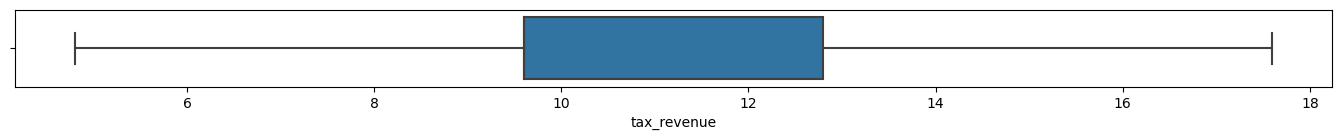

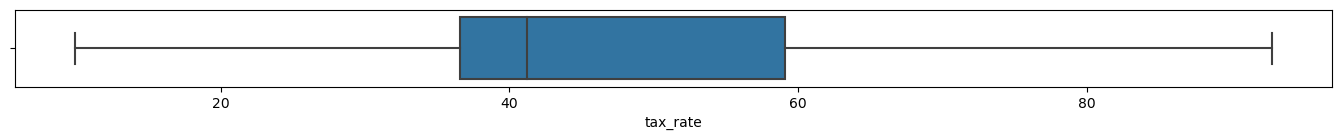

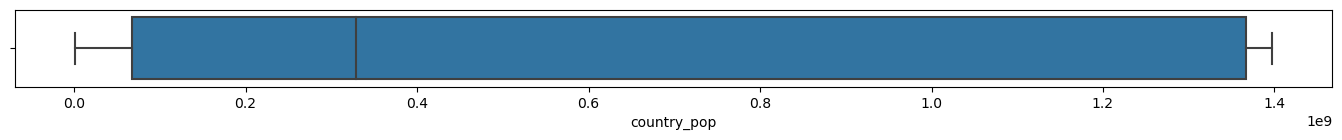

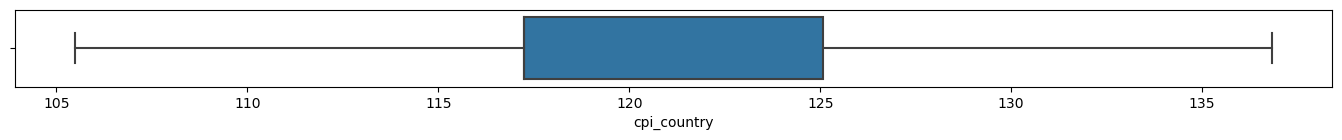

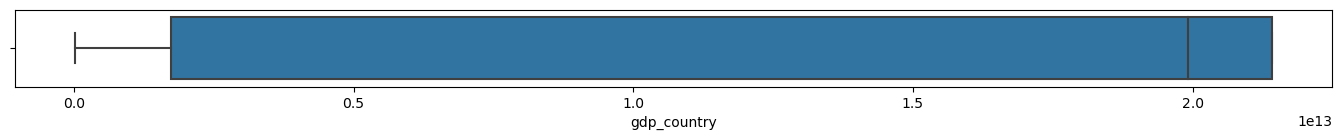

In [21]:
for i in final_data [["age","life_expectancy","tax_revenue","tax_rate","country_pop","cpi_country","gdp_country"]]:
    plt.figure(figsize=(17,1))
    sns.boxplot(data= final_data [["age","life_expectancy","tax_revenue","tax_rate","country_pop","cpi_country","gdp_country"]], x=i)

### Train Test Split

In [22]:
final_data

,position,wealth,age,life_expectancy,tax_revenue,tax_rate,country_pop,cpi_country,gdp_country,industry_Automotive,...,country_of_residence_United Kingdom,country_of_residence_United States,country_of_residence_Uruguay,country_of_residence_Vietnam,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,1,211000,74,82.50,17.6,60.7,67059887,110.05,2715518274227,0,...,0,0,0,0,0,0,1,0,0,0
1,2,180000,51,78.50,9.6,36.6,328239523,117.24,21427700000000,1,...,0,1,0,0,0,0,0,1,0,0
2,3,114000,59,78.50,9.6,36.6,328239523,117.24,21427700000000,0,...,0,1,0,0,0,0,0,1,0,0
3,4,107000,78,78.50,9.6,36.6,328239523,117.24,21427700000000,0,...,0,1,0,0,0,0,0,1,0,0
4,5,106000,92,78.50,9.6,36.6,328239523,117.24,21427700000000,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,2540,1000,51,77.00,9.4,59.2,1397715000,125.08,19910000000000,0,...,0,0,0,0,0,1,0,0,0,0
2587,2540,1000,80,78.50,9.6,36.6,328239523,117.24,21427700000000,0,...,0,1,0,0,0,0,0,1,0,0
2588,2540,1000,60,77.00,9.4,59.2,1397715000,125.08,19910000000000,0,...,0,0,0,0,0,1,0,0,0,0
2589,2540,1000,71,77.00,9.4,59.2,1397715000,125.08,19910000000000,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
x= final_data.drop(columns = "wealth") #independent variable
y = final_data["wealth"]

In [24]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=24) #0.2 utk test , 0.8 utk train, scr random

In [25]:
x_train

,position,age,life_expectancy,tax_revenue,tax_rate,country_pop,cpi_country,gdp_country,industry_Automotive,industry_Construction & Engineering,...,country_of_residence_United Kingdom,country_of_residence_United States,country_of_residence_Uruguay,country_of_residence_Vietnam,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
706,699,67,71.15,11.2,49.7,1366417754,136.84,2611000000000,0,0,...,0,0,0,0,0,1,0,0,0,0
69,70,66,72.70,11.4,46.2,144373535,136.84,1699876578871,0,0,...,0,0,0,0,0,0,1,0,0,0
1678,1647,75,77.00,9.4,59.2,1397715000,125.08,19910000000000,0,0,...,0,0,0,0,0,1,0,0,0,0
2082,2020,80,78.50,9.6,36.6,328239523,117.24,21427700000000,0,0,...,0,1,0,0,0,0,0,1,0,0
948,949,50,72.70,11.4,46.2,144373535,136.84,1699876578871,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,2259,73,71.50,10.2,30.1,270203917,136.84,1119190780753,0,0,...,0,0,0,0,0,1,0,0,0,0
361,352,58,77.00,9.4,59.2,1397715000,125.08,19910000000000,0,0,...,0,0,0,0,0,1,0,0,0,0
2370,2405,56,83.60,10.1,28.8,8574832,105.48,703082435360,0,0,...,0,0,0,0,0,0,1,0,0,0
946,949,77,83.60,10.1,28.8,8574832,105.48,703082435360,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
y_train

706      4000
69      22100
1678     1800
2082     1400
948      3100
        ...  
2319     1200
361      6800
2370     1100
946      3100
441      5700
Name: wealth, Length: 1956, dtype: int64

In [27]:
x_test

,position,age,life_expectancy,tax_revenue,tax_rate,country_pop,cpi_country,gdp_country,industry_Automotive,industry_Construction & Engineering,...,country_of_residence_United Kingdom,country_of_residence_United States,country_of_residence_Uruguay,country_of_residence_Vietnam,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
1208,1217,85,71.15,11.2,49.7,1366417754,136.84,2611000000000,0,0,...,0,0,0,0,0,1,0,0,0,0
1195,1164,67,78.50,9.6,36.6,328239523,117.24,21427700000000,0,0,...,0,1,0,0,0,0,0,1,0,0
241,242,77,71.15,17.6,29.2,58558270,136.84,351431649241,0,0,...,0,0,0,0,1,0,0,0,0,0
1366,1368,78,82.80,17.6,25.3,9053300,108.15,395098666122,1,0,...,0,0,0,0,0,1,0,0,0,0
633,636,46,78.50,9.6,36.6,328239523,117.24,21427700000000,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1272,70,71.15,17.6,29.2,58558270,136.84,351431649241,0,0,...,0,0,0,0,1,0,0,0,0,0
248,249,61,72.70,11.4,46.2,144373535,136.84,1699876578871,0,0,...,0,0,0,0,0,0,1,0,0,0
1997,2020,55,77.00,9.4,59.2,1397715000,125.08,19910000000000,0,0,...,0,0,0,0,0,1,0,0,0,0
924,905,73,78.50,9.6,36.6,328239523,117.24,21427700000000,0,0,...,0,1,0,0,0,0,0,1,0,0


In [28]:
y_test

1208    2500
1195    2600
241     8400
1366    2200
633     4300
        ... 
1259    2400
248     8200
1997    1400
924     3200
1887    1500
Name: wealth, Length: 490, dtype: int64

### Handling Imbalance Data

In [29]:
y_train.value_counts()

wealth
1200     108
1100     103
1300      93
1400      82
1600      80
        ... 
14500      1
15900      1
17100      1
68000      1
15500      1
Name: count, Length: 196, dtype: int64

### Scalling


In [30]:
standard_scaler = StandardScaler()
x_train_scaler = standard_scaler.fit_transform(x_train)
x_test_scaler = standard_scaler.transform(x_test)
x_test_scaler 

array([[-0.08932881,  1.53582832, -2.12382766, ..., -0.69898818,
        -0.1426334 , -0.15518946],
       [-0.16041445,  0.15724777,  0.08228857, ...,  1.43063936,
        -0.1426334 , -0.15518946],
       [-1.39703627,  0.92312585, -2.12382766, ..., -0.69898818,
        -0.1426334 , -0.15518946],
       ...,
       [ 0.98768564, -0.76180593, -0.36793923, ..., -0.69898818,
        -0.1426334 , -0.15518946],
       [-0.5077952 ,  0.61677462,  0.08228857, ...,  1.43063936,
        -0.1426334 , -0.15518946],
       [ 0.83344322,  0.00407215, -0.24787849, ..., -0.69898818,
        -0.1426334 , -0.15518946]])

### Machine Learning

In [31]:
rf_regressor = RandomForestRegressor()
rf_regressor

RandomForestRegressor()

In [32]:
rf_regressor.fit(x_train_scaler,y_train)


RandomForestRegressor()

In [33]:
y_prediction = rf_regressor.predict(x_test_scaler)
y_prediction

array([  2500.,   2600.,   8403.,   2200.,   4300.,   2500.,   2500.,
         7600.,   1500.,   1300.,   1800.,   4401.,   2600.,   1700.,
         2200.,   2900.,   1400.,   2400.,   1300.,   4400.,   2100.,
         6898.,   1700.,   1500.,   4000.,   1100.,   4000.,   9598.,
         1100.,   3500.,   3900.,   2400.,   3300.,   2300.,  25693.,
         3400.,   1500.,   6114.,   1100.,   6499.,   2100.,   1400.,
         5500.,   5303.,   2200.,  10197.,   8190.,   2100.,   2200.,
         6006.,   1700.,   3800.,   1400.,   4000.,   2200.,   1300.,
         1200.,   1600.,   8117.,   1200.,   3700.,   6111.,   5500.,
         1000.,   2200.,  17778.,   1100.,  17769.,   2800.,   4300.,
         6700.,   2600.,   1100.,   1200.,   2200.,   7002.,   4499.,
         1500.,   2900.,   1600.,   4499.,   1500.,   3600.,   1700.,
         1400.,   1500.,   2600.,   5300.,  12953.,   2300.,   7697.,
         2600.,   2400.,   1900.,   3400.,   1200.,  16301.,   4300.,
         3500.,   19

In [36]:
y_test #compare dg y_prediction

1208    2500
1195    2600
241     8400
1366    2200
633     4300
        ... 
1259    2400
248     8200
1997    1400
924     3200
1887    1500
Name: wealth, Length: 490, dtype: int64

## Evaluation Matrix

In [35]:
mean_absolute_percentage_error(y_test,y_prediction)

0.0010226946200609607

In [38]:
mean_squared_error(y_test,y_prediction)

128582.38163265307